# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[(12,
  [("'s", 0.016426632),
   ('``', 0.015711663),
   ("n't", 0.0150101315),
   ('film', 0.013412214),
   ('story', 0.0113688605),
   ("''", 0.010318767),
   ('movie', 0.009412564),
   ('part', 0.008779231),
   ('even', 0.008666025),
   ('book', 0.008251996)]),
 (13,
  [('movie', 0.02395715),
   ("'s", 0.022755666),
   ('film', 0.010924142),
   ("n't", 0.010340725),
   ('``', 0.009964428),
   ('story', 0.0096866125),
   ("''", 0.009471513),
   ('even', 0.0089179),
   ('book', 0.008709794),
   ('half', 0.008686519)]),
 (11,
  [('movie', 0.025090385),
   ("'s", 0.0192507),
   ('film', 0.01640115),
   ('story', 0.012025908),
   ('good', 0.009151807),
   ('villeneuve', 0.008918705),
   ("n't", 0.008516782),
   ('dune', 0.008194448),
   ('first', 0.008018631),
   ('book', 0.007941567)]),
 (5,
  [("'s", 0.018461116),
   ('movie', 0.0135824615),
   ("''", 0.013043944),
   ("n't", 0.0124842115),
   ('film', 0.011952489),
   ('one', 0.011899333),
   ('book', 0.010368081),
   ('``', 0.0099173


Coherence Score: 0.35854857549031766


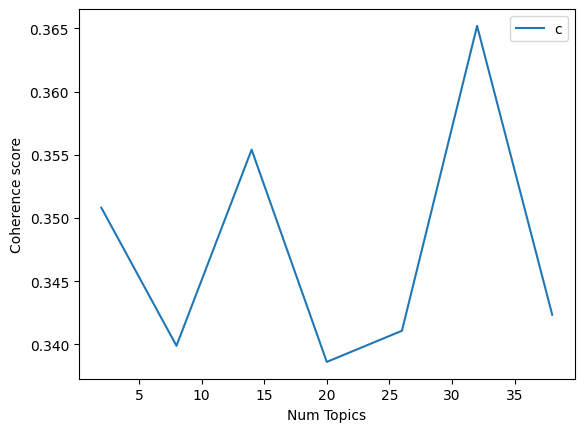

Num Topics = 2  has Coherence Value of 0.3508
Num Topics = 8  has Coherence Value of 0.3399
Num Topics = 14  has Coherence Value of 0.3554
Num Topics = 20  has Coherence Value of 0.3386
Num Topics = 26  has Coherence Value of 0.3411
Num Topics = 32  has Coherence Value of 0.3652
Num Topics = 38  has Coherence Value of 0.3423


In [8]:
import pandas as pd
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from gensim.corpora import Dictionary

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load Dune reviews data
# Assuming you have a CSV file named 'dune_reviews.csv' with a column named 'Review'
dune_reviews_df = pd.read_csv('/content/Dune_reviews (4).csv')

# Preprocess the data
# Example preprocessing steps (you may need to modify this based on your requirements)
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stopwords.words('english') and token not in string.punctuation and len(token) > 1]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

dune_reviews_df['Processed_Review'] = dune_reviews_df['Review'].apply(preprocess)

# Create dictionary and corpus
dune_dictionary = Dictionary(dune_reviews_df['Processed_Review'])
dune_corpus = [dune_dictionary.doc2bow(doc) for doc in dune_reviews_df['Processed_Review']]

# Step 16: Building LDA Model (not Mallet)
num_topics = 20
lda_model = gensim.models.LdaModel(corpus=dune_corpus, id2word=dune_dictionary, num_topics=num_topics)

# Show Topics
pprint.pprint(lda_model.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=lda_model, texts=dune_reviews_df['Processed_Review'], dictionary=dune_dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score:', coherence_ldamallet)


# Step 17: How to find the optimal number of topics for LDA?
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dune_dictionary, corpus=dune_corpus, texts=dune_reviews_df['Processed_Review'], start=2, limit=40, step=6)

# Show graph
limit = 40
start = 2
step = 6
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))




## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

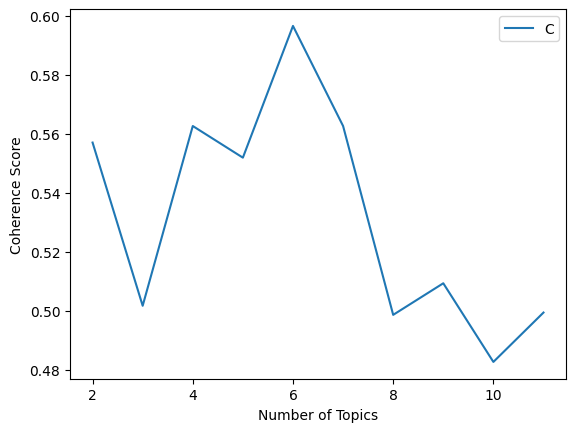

[(0, '0.328*"movi" + 0.255*"film" + 0.249*"dune" + 0.213*"villeneuv" + 0.203*"one" + 0.174*"book" + 0.161*"stori" + 0.145*"like" + 0.131*"novel" + 0.126*"half"'), (1, '0.343*"movi" + -0.208*"baron" + -0.201*"dune" + -0.169*"spice" + 0.167*"stori" + -0.155*"leto" + 0.149*"book" + -0.129*"star" + -0.128*"arraki" + -0.107*"like"'), (2, '0.386*"film" + -0.319*"movi" + 0.182*"version" + 0.173*"charact" + 0.171*"even" + 0.123*"scene" + -0.119*"year" + 0.107*"dune" + -0.094*"everyth" + 0.091*"element"'), (3, '-0.321*"novel" + -0.213*"villeneuv" + 0.182*"charact" + 0.154*"get" + 0.152*"book" + 0.142*"seen" + -0.131*"dune" + -0.125*"adapt" + 0.123*"movi" + 0.116*"stori"'), (4, '-0.234*"one" + -0.204*"film" + -0.201*"felt" + -0.182*"still" + 0.173*"book" + -0.167*"also" + 0.159*"version" + -0.156*"part" + -0.154*"like" + 0.135*"even"'), (5, '0.367*"book" + -0.213*"novel" + -0.184*"stori" + 0.147*"dune" + 0.146*"make" + 0.146*"weak" + 0.146*"pace" + 0.139*"adapt" + 0.111*"think" + 0.111*"deep"'),

In [9]:
# Write your code here
# Importing necessary libraries
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd

# Function to load data from a CSV file
def load_data(file_path):
    """
    Input: file_path - Path to the CSV file containing Dune reviews
    Output: List of Dune reviews
    """
    dune_reviews_df = pd.read_csv(file_path)
    reviews = dune_reviews_df['Review'].tolist()
    return reviews

# Function to preprocess the data
def preprocess_data(doc_set):
    """
    Input: doc_set - List of Dune reviews
    Output: Preprocessed text (tokenized, stopwords removed, stemmed)
    """
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for doc in doc_set:
        raw = doc.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [token for token in tokens if token not in en_stop]
        stemmed_tokens = [p_stemmer.stem(token) for token in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts

# Function to prepare corpus
def prepare_corpus(doc_clean):
    """
    Input: doc_clean - Preprocessed text
    Output: Dictionary and Document Term Matrix
    """
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary, doc_term_matrix

# Function to create LSA model
def create_gensim_lsa_model(doc_clean, number_of_topics, words):
    """
    Input: doc_clean - Preprocessed text
           number_of_topics - Number of topics to generate
           words - Number of words associated with each topic
    Output: LSA model
    """
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word=dictionary)
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

# Function to compute coherence values
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, start, stop, step):
    """
    Input: dictionary - Gensim dictionary
           doc_term_matrix - Gensim corpus
           doc_clean - Preprocessed text
           start - Start number of topics
           stop - Stop number of topics
           step - Step size
    Output: Model list, coherence values
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Function to plot coherence scores
def plot_graph(doc_clean, start, stop, step):
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, doc_clean, start, stop, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score")
    plt.legend(("Coherence Values"), loc='best')
    plt.show()

# Define file path for Dune reviews
file_path = '/content/Dune_reviews (4).csv'

# Load Dune reviews
dune_reviews = load_data(file_path)

# Preprocess the data
clean_text = preprocess_data(dune_reviews)

# Determine the optimal number of topics and plot coherence scores
start, stop, step = 2, 12, 1
plot_graph(clean_text, start, stop, step)

# Set the number of topics based on the coherence score
number_of_topics = 7

# Set the number of words associated with each topic
words = 10

# Create LSA model with the optimal number of topics
lsa_model = create_gensim_lsa_model(clean_text, number_of_topics, words)




## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [34]:
!pip install lda2vec


In [12]:
pip install lda2vec


In [35]:
!pip install numpy scipy pandas scikit-learn


In [36]:
!pip install --upgrade lda2vec


In [37]:
pip install pyldavis


In [39]:
!pip install pyLDAvis


In [41]:
!pip install git+https://github.com/bmabey/pyLDAvis.git@master#egg=pyLDAvis


  Cloning https://github.com/bmabey/pyLDAvis.git (to revision master) to /tmp/pip-install-mb7n2qft/pyldavis_77aeb24e49fd46e1964c013c0df94f0c
  Running command git clone --filter=blob:none --quiet https://github.com/bmabey/pyLDAvis.git /tmp/pip-install-mb7n2qft/pyldavis_77aeb24e49fd46e1964c013c0df94f0c
  Resolved https://github.com/bmabey/pyLDAvis.git to commit 16800f36bc95b4c99d8c26d51daa3485c8cb76da
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [43]:
!pip install --upgrade pyldavis


In [11]:
# Step 1: Prepare Data
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer

# Load the Dune review data
data = pd.read_csv('/content/Dune_reviews (4).csv')

# Tokenize the text data
tokenized_data = data['Review'].apply(lambda x: x.split())

# Create a dictionary from the tokenized data
dictionary = Dictionary(tokenized_data)

# Create a bag-of-words representation of the data
corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]

# Step 2: Train LDA model and calculate coherence score
coherence_scores = []
num_topics_list = range(2, 21)  # Testing number of topics from 2 to 20

for num_topics in num_topics_list:
    # Train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

    # Calculate coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Step 3: Select the number of topics with maximum coherence score
optimal_num_topics = num_topics_list[coherence_scores.index(max(coherence_scores))]

# Step 4: Train LDA model with the optimal number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics)

# Step 5: Generate and summarize topics
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")


Topic 0: 0.068*"the" + 0.025*"and" + 0.023*"of" + 0.019*"a" + 0.014*"to" + 0.013*"is" + 0.012*"that" + 0.011*"this" + 0.009*"for" + 0.008*"in"
Topic 1: 0.056*"the" + 0.030*"of" + 0.024*"a" + 0.023*"to" + 0.021*"and" + 0.020*"is" + 0.012*"in" + 0.011*"I" + 0.011*"this" + 0.010*"it"


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [6]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score

# Load the Dune review data
data = pd.read_csv('/content/Dune_reviews (4).csv')

# Assuming 'Dune_reviews.csv' contains your review data with a column named 'Review'

# Preprocess the text data
data['Review'] = data['Review'].str.lower()

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(data['Review'])

# Find the optimal number of topics using silhouette score
scores = []
for k in range(2, 21):  # Try different numbers of topics
    topic_model = BERTopic(nr_topics=k, calculate_probabilities=True, verbose=True)
    topics, _ = topic_model.fit_transform(data['Review'])
    silhouette_avg = silhouette_score(X, topics)
    scores.append(silhouette_avg)

# Find the number of topics with the highest silhouette score
optimal_num_topics = scores.index(max(scores)) + 2  # Add 2 to account for starting from k=2

print("Optimal number of topics:", optimal_num_topics)


2024-03-30 23:17:25,359 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:20:31,790 - BERTopic - Embedding - Completed ✓
2024-03-30 23:20:31,793 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:20:49,572 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:20:49,574 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:20:49,682 - BERTopic - Cluster - Completed ✓
2024-03-30 23:20:49,685 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 23:20:50,131 - BERTopic - Representation - Completed ✓
2024-03-30 23:20:50,133 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 23:20:50,577 - BERTopic - Topic reduction - Reduced number of topics from 26 to 2
2024-03-30 23:20:50,763 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:23:51,575 - BERTopic - Embedding - Completed ✓
2024-03-30 23:23:51,578 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:24:00,981 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:24:00,983 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:24:01,092 - BERTopic - Cluster - Completed ✓
2024-03-30 23:24:01,094 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 23:24:01,518 - BERTopic - Representation - Completed ✓
2024-03-30 23:24:01,520 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 23:24:01,930 - BERTopic - Topic reduction - Reduced number of topics from 25 to 3
2024-03-30 23:24:02,140 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:27:02,291 - BERTopic - Embedding - Completed ✓
2024-03-30 23:27:02,294 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:27:12,355 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:27:12,357 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:27:12,460 - BERTopic - Cluster - Completed ✓
2024-03-30 23:27:12,462 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 23:27:12,900 - BERTopic - Representation - Completed ✓
2024-03-30 23:27:12,902 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 23:27:13,354 - BERTopic - Topic reduction - Reduced number of topics from 25 to 4
2024-03-30 23:27:13,579 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:30:14,388 - BERTopic - Embedding - Completed ✓
2024-03-30 23:30:14,390 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:30:23,683 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:30:23,685 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:30:23,786 - BERTopic - Cluster - Completed ✓
2024-03-30 23:30:23,789 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 23:30:24,214 - BERTopic - Representation - Completed ✓
2024-03-30 23:30:24,217 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 23:30:24,634 - BERTopic - Topic reduction - Reduced number of topics from 27 to 5
2024-03-30 23:30:24,860 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:33:25,592 - BERTopic - Embedding - Completed ✓
2024-03-30 23:33:25,597 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:33:34,578 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:33:34,583 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:33:34,758 - BERTopic - Cluster - Completed ✓
2024-03-30 23:33:34,761 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 23:33:35,385 - BERTopic - Representation - Completed ✓
2024-03-30 23:33:35,386 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 23:33:35,801 - BERTopic - Topic reduction - Reduced number of topics from 27 to 6
2024-03-30 23:33:36,027 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:36:45,972 - BERTopic - Embedding - Completed ✓
2024-03-30 23:36:45,974 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:36:55,254 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:36:55,257 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:36:55,355 - BERTopic - Cluster - Completed ✓
2024-03-30 23:36:55,358 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 23:36:55,774 - BERTopic - Representation - Completed ✓
2024-03-30 23:36:55,776 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 23:36:56,185 - BERTopic - Topic reduction - Reduced number of topics from 25 to 7
2024-03-30 23:36:56,443 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:40:05,443 - BERTopic - Embedding - Completed ✓
2024-03-30 23:40:05,447 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:40:15,540 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:40:15,543 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:40:15,644 - BERTopic - Cluster - Completed ✓
2024-03-30 23:40:15,646 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 23:40:16,086 - BERTopic - Representation - Completed ✓
2024-03-30 23:40:16,088 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 23:40:16,535 - BERTopic - Topic reduction - Reduced number of topics from 25 to 8
2024-03-30 23:40:16,808 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:43:27,210 - BERTopic - Embedding - Completed ✓
2024-03-30 23:43:27,213 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:43:35,751 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:43:35,754 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:43:35,855 - BERTopic - Cluster - Completed ✓
2024-03-30 23:43:35,858 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 23:43:36,299 - BERTopic - Representation - Completed ✓
2024-03-30 23:43:36,301 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 23:43:36,733 - BERTopic - Topic reduction - Reduced number of topics from 25 to 9
2024-03-30 23:43:37,020 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:46:52,142 - BERTopic - Embedding - Completed ✓
2024-03-30 23:46:52,144 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:47:01,508 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:47:01,510 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:47:01,619 - BERTopic - Cluster - Completed ✓
2024-03-30 23:47:01,621 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 23:47:02,032 - BERTopic - Representation - Completed ✓
2024-03-30 23:47:02,034 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 23:47:02,452 - BERTopic - Topic reduction - Reduced number of topics from 25 to 10
2024-03-30 23:47:02,738 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:50:15,708 - BERTopic - Embedding - Completed ✓
2024-03-30 23:50:15,715 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:50:24,873 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:50:24,875 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:50:24,973 - BERTopic - Cluster - Completed ✓
2024-03-30 23:50:24,976 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 23:50:25,430 - BERTopic - Representation - Completed ✓
2024-03-30 23:50:25,432 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 23:50:25,853 - BERTopic - Topic reduction - Reduced number of topics from 26 to 11
2024-03-30 23:50:26,159 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:53:28,674 - BERTopic - Embedding - Completed ✓
2024-03-30 23:53:28,677 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:53:37,821 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:53:37,823 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:53:37,933 - BERTopic - Cluster - Completed ✓
2024-03-30 23:53:37,936 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 23:53:38,366 - BERTopic - Representation - Completed ✓
2024-03-30 23:53:38,369 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 23:53:38,780 - BERTopic - Topic reduction - Reduced number of topics from 25 to 12
2024-03-30 23:53:39,066 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:56:39,906 - BERTopic - Embedding - Completed ✓
2024-03-30 23:56:39,912 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:56:49,819 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:56:49,822 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:56:49,933 - BERTopic - Cluster - Completed ✓
2024-03-30 23:56:49,936 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 23:56:50,383 - BERTopic - Representation - Completed ✓
2024-03-30 23:56:50,384 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 23:56:50,828 - BERTopic - Topic reduction - Reduced number of topics from 27 to 13
2024-03-30 23:56:51,123 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-30 23:59:50,468 - BERTopic - Embedding - Completed ✓
2024-03-30 23:59:50,472 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 23:59:59,672 - BERTopic - Dimensionality - Completed ✓
2024-03-30 23:59:59,674 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 23:59:59,778 - BERTopic - Cluster - Completed ✓
2024-03-30 23:59:59,780 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-31 00:00:00,193 - BERTopic - Representation - Completed ✓
2024-03-31 00:00:00,195 - BERTopic - Topic reduction - Reducing number of topics
2024-03-31 00:00:00,625 - BERTopic - Topic reduction - Reduced number of topics from 26 to 14
2024-03-31 00:00:00,935 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-31 00:03:12,554 - BERTopic - Embedding - Completed ✓
2024-03-31 00:03:12,557 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-31 00:03:20,852 - BERTopic - Dimensionality - Completed ✓
2024-03-31 00:03:20,856 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-31 00:03:21,024 - BERTopic - Cluster - Completed ✓
2024-03-31 00:03:21,027 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-31 00:03:21,806 - BERTopic - Representation - Completed ✓
2024-03-31 00:03:21,812 - BERTopic - Topic reduction - Reducing number of topics
2024-03-31 00:03:22,570 - BERTopic - Topic reduction - Reduced number of topics from 25 to 15
2024-03-31 00:03:23,103 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-31 00:06:24,879 - BERTopic - Embedding - Completed ✓
2024-03-31 00:06:24,885 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-31 00:06:33,599 - BERTopic - Dimensionality - Completed ✓
2024-03-31 00:06:33,605 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-31 00:06:33,783 - BERTopic - Cluster - Completed ✓
2024-03-31 00:06:33,789 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-31 00:06:34,559 - BERTopic - Representation - Completed ✓
2024-03-31 00:06:34,562 - BERTopic - Topic reduction - Reducing number of topics
2024-03-31 00:06:35,215 - BERTopic - Topic reduction - Reduced number of topics from 27 to 16
2024-03-31 00:06:35,529 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-31 00:09:37,306 - BERTopic - Embedding - Completed ✓
2024-03-31 00:09:37,308 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-31 00:09:47,390 - BERTopic - Dimensionality - Completed ✓
2024-03-31 00:09:47,393 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-31 00:09:47,492 - BERTopic - Cluster - Completed ✓
2024-03-31 00:09:47,495 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-31 00:09:47,928 - BERTopic - Representation - Completed ✓
2024-03-31 00:09:47,930 - BERTopic - Topic reduction - Reducing number of topics
2024-03-31 00:09:48,379 - BERTopic - Topic reduction - Reduced number of topics from 25 to 17
2024-03-31 00:09:48,705 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-31 00:12:50,871 - BERTopic - Embedding - Completed ✓
2024-03-31 00:12:50,873 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-31 00:13:00,147 - BERTopic - Dimensionality - Completed ✓
2024-03-31 00:13:00,150 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-31 00:13:00,252 - BERTopic - Cluster - Completed ✓
2024-03-31 00:13:00,254 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-31 00:13:00,686 - BERTopic - Representation - Completed ✓
2024-03-31 00:13:00,688 - BERTopic - Topic reduction - Reducing number of topics
2024-03-31 00:13:01,127 - BERTopic - Topic reduction - Reduced number of topics from 25 to 18
2024-03-31 00:13:01,459 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-31 00:16:04,552 - BERTopic - Embedding - Completed ✓
2024-03-31 00:16:04,555 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-31 00:16:13,818 - BERTopic - Dimensionality - Completed ✓
2024-03-31 00:16:13,821 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-31 00:16:13,927 - BERTopic - Cluster - Completed ✓
2024-03-31 00:16:13,929 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-31 00:16:14,387 - BERTopic - Representation - Completed ✓
2024-03-31 00:16:14,389 - BERTopic - Topic reduction - Reducing number of topics
2024-03-31 00:16:14,794 - BERTopic - Topic reduction - Reduced number of topics from 27 to 19
2024-03-31 00:16:15,133 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-03-31 00:19:17,208 - BERTopic - Embedding - Completed ✓
2024-03-31 00:19:17,211 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-31 00:19:26,330 - BERTopic - Dimensionality - Completed ✓
2024-03-31 00:19:26,332 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-31 00:19:26,442 - BERTopic - Cluster - Completed ✓
2024-03-31 00:19:26,446 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-31 00:19:26,870 - BERTopic - Representation - Completed ✓
2024-03-31 00:19:26,872 - BERTopic - Topic reduction - Reducing number of topics
2024-03-31 00:19:27,293 - BERTopic - Topic reduction - Reduced number of topics from 25 to 20


Optimal number of topics: 20


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
LDA, known for its model architecture that generates topics as probability distributions over words for each document, offers high interpretability due to explicit word-topic distributions. However, it may face scalability issues with very large datasets.

LSA, on the other hand, utilizes singular value decomposition (SVD) to capture underlying semantic structure but may result in less interpretable topics compared to LDA. While it is more scalable than LDA, it is still sensitive to noise and may not capture subtle semantic relationships effectively.

BERTopic, leveraging transformer-based models like BERT, generates dense clusters of topics based on contextual embeddings. This approach can yield highly interpretable topics, especially when visualized using techniques like pyLDAvis. However, it may require substantial computational resources.

lda2vec combines traditional LDA with distributed representations learned by word2vec, capturing both document-level and word-level semantics. It offers scalability benefits over traditional LDA but may be computationally expensive. The interpretability of topics may be similar to LDA, leveraging semantic representations learned by word2vec.

In conclusion, the choice of algorithm depends on factors such as dataset size, interpretability requirements, computational resources, and domain considerations. Experimentation and empirical evaluation are crucial for selecting the most suitable algorithm for a particular topic modeling task.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Overall, the exercise provided a comprehensive understanding of text data preprocessing and feature extraction using various topic modeling algorithms such as LDA, LSA, BERTopic, and lda2vec. Implementing these algorithms helped in grasping the nuances of feature extraction from text data, including tokenization, vectorization, and model training. Additionally, exploring different techniques for visualizing topics and evaluating model performance enhanced my understanding of the topic modeling process.





'''